# Guided Capstone Step 6. Documentation

**The Data Science Method**  


1.   Problem Identification 

2.   Data Wrangling 
  
3.   Exploratory Data Analysis 
 
4.   Pre-processing and Training Data Development

5.  Modeling

6.   **Documentation**
  * Review the Results
  * Finalize Code 
  * Finalize Documentation
  * Create a Project Report 
  * Create a Slide Deck for the Executive Audience

In this guided capstone we are going to revisit many of the actions we took in the previous guided capstone steps. This gives you the opportunity to practice the code you wrote to solve the questions in step 4 and 5. 

**<font color='teal'> Start by loading the necessary packages and printing out our current working directory just to confirm we are in the correct project directory. </font>**

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import os
from sklearn import linear_model, preprocessing
from sklearn.metrics import explained_variance_score, mean_absolute_error
from sklearn.model_selection import train_test_split
import datetime 
import seaborn as sns
%matplotlib inline 

os.chdir('C:\\Users\\Amit\\Desktop\\SPRINGBOARD PROJECTS\\Chapter 6- DSM\\Data Wrangling\\Step 2\\data')
os.getcwd()

'C:\\Users\\Amit\\Desktop\\SPRINGBOARD PROJECTS\\Chapter 6- DSM\\Data Wrangling\\Step 2\\data'

## Fit Models with Training Dataset

**<font color='teal'> Using sklearn fit the model you chose in Guided Capstone 5 on your training dataset. This includes: creating dummy features for states if you need them, scaling the data,and creating train and test splits before fitting the chosen model.Also, remember to generate a model performance score(MAE, or explained variance) based on the testing hold-out data set.</font>**

#### Best Model 

In [2]:
bmd = pd.read_csv('step3(1)_output.csv')
bmd = bmd.drop('Unnamed: 0', axis=1)
bmd.head()

,Name,state,summit_elev,vertical_drop,base_elev,trams,fastEight,fastSixes,fastQuads,quad,...,SkiableTerrain_ac,Snow Making_ac,daysOpenLastYear,yearsOpen,averageSnowfall,AdultWeekday,AdultWeekend,projectedDaysOpen,NightSkiing_ac,clusters
0,Alyeska Resort,Alaska,3939,2500,250,1,0.0,0,2,2,...,1610.0,113.0,150.0,60.0,669.0,65.0,85.0,150.0,550.0,0
1,Eaglecrest Ski Area,Alaska,2600,1540,1200,0,0.0,0,0,0,...,640.0,60.0,45.0,44.0,350.0,47.0,53.0,90.0,0.0,0
2,Hilltop Ski Area,Alaska,2090,294,1796,0,0.0,0,0,0,...,30.0,30.0,150.0,36.0,69.0,30.0,34.0,152.0,30.0,0
3,Arizona Snowbowl,Arizona,11500,2300,9200,0,0.0,1,0,2,...,777.0,104.0,122.0,81.0,260.0,89.0,89.0,122.0,0.0,1
4,Sunrise Park Resort,Arizona,11100,1800,9200,0,0.0,0,1,2,...,800.0,80.0,115.0,49.0,250.0,74.0,78.0,104.0,80.0,1


In [3]:
bmd2 = bmd.drop(['state','summit_elev','base_elev'], axis=1) 

X = bmd2.drop(['Name','AdultWeekend'], axis=1) 
y = bmd2.AdultWeekend 

scaler = preprocessing.StandardScaler().fit(X)
X_scaled = scaler.transform(X)
y = y.ravel() 
X3_train, X3_test, y3_train, y3_test = train_test_split(X_scaled, y, test_size=0.25, random_state=1) 

lm = linear_model.LinearRegression()

model_3 = lm.fit(X3_train,y3_train)
y3_pred = model_3.predict(X3_test)

#coef = pd.DataFrame(abs(lm.coef_), X.columns, columns=['Coefficient'])
#coef.sort_values('Coefficient', ascending=False).head(10)
y3_pred


array([ 58.05443989,  85.24205771,  82.53046783,  78.52695594,
        67.06921832,  81.29633413,  38.25769306,  47.70007761,
        89.12734943,  85.67708656,  51.80507187,  80.9062263 ,
        53.36363566,  65.7663714 ,  63.37308526,  88.96762221,
        41.32200128,  77.24518479,  63.13016852,  43.39563762,
       108.71764765,  37.56858485,  53.93648003,  50.31888436,
        50.2883868 ,  59.11479772,  67.17693524,  67.64853879,
        63.95495832,  64.9198242 ,  38.92033784,  52.97697961,
        79.11397948,  57.32166925,  76.31390809,  54.32542103,
        24.95832495,  28.91283086,  55.02534506,  38.64443199,
        50.00152119,  63.5221212 ,  88.85112601,  67.02888576,
        69.83695618,  52.59115696,  64.17519926, 165.82374962,
        30.9583456 ,  63.78374031,  62.77950085,  61.52185736,
        53.73514143,  46.24392576,  60.91171121,  42.23324977,
        87.5857566 ,  32.06559851, 120.90932696, 116.04417263,
        57.97897213,  54.80992868,  39.55721067,  86.27

In [4]:
evs_m3 = round(explained_variance_score(y3_test, y3_pred),4)
mae_m3 = round(mean_absolute_error(y3_test, y3_pred),4)

print('The explained variance score is {} and the mean absolute error is {}.'.format(evs_m3,mae_m3))

The explained variance score is 0.931 and the mean absolute error is 5.2763.


## Review the results 

**<font color='teal'> Now, let's predict the Big Mountain Weekend price with our model in order to provide a recommendation to our managers on how to price the `AdultWeekend` lift ticket. First we need to find the row for Big Mountain resort in our data using string contains or string matching.</font>**

In [5]:
big_mountain_resort = bmd[bmd['Name'].str.contains('Whitefish Mountain Resort')]
big_mountain_resort



,Name,state,summit_elev,vertical_drop,base_elev,trams,fastEight,fastSixes,fastQuads,quad,...,SkiableTerrain_ac,Snow Making_ac,daysOpenLastYear,yearsOpen,averageSnowfall,AdultWeekday,AdultWeekend,projectedDaysOpen,NightSkiing_ac,clusters
151,Whitefish Mountain Resort,Montana,6817,2353,4464,0,0.0,0,3,2,...,3000.0,600.0,123.0,72.0,333.0,81.0,81.0,123.0,600.0,2


**<font color='teal'> Prepare the Big Mountain resort data row as you did in the model fitting stage.</font>**

In [6]:
big_mountain_resort_1 = big_mountain_resort.drop(['state','summit_elev','base_elev'],axis=1)
big_mountain_resort_1


,Name,vertical_drop,trams,fastEight,fastSixes,fastQuads,quad,triple,double,surface,...,SkiableTerrain_ac,Snow Making_ac,daysOpenLastYear,yearsOpen,averageSnowfall,AdultWeekday,AdultWeekend,projectedDaysOpen,NightSkiing_ac,clusters
151,Whitefish Mountain Resort,2353,0,0.0,0,3,2,6,0,3,...,3000.0,600.0,123.0,72.0,333.0,81.0,81.0,123.0,600.0,2


<!-- #Predict the Big Mountain resort `Adult Weekend` price and print it out.</font>** This is our expected price to present to management. Based on our model given the characteristics of the resort in comparison to other ski resorts and their unique characteristics. -->

In [7]:
bmrX = big_mountain_resort_1.drop(['Name','AdultWeekend'],axis=1)
bmry = big_mountain_resort_1.AdultWeekend

scaler_bmr = preprocessing.StandardScaler().fit(bmrX)
X_scaled_bmr = scaler_bmr.transform(bmrX) 

price = model_3.predict(X_scaled_bmr)
print('The predicted adult weekend price is {}'.format(str(price)[1:-1]))

The predicted adult weekend price is 64.07342102


**<font color='teal'> Print the Big Mountain resort actual `Adult Weekend` price.</font>**

In [8]:
bmd3 = bmd.set_index('Name')
Adult_weekend_price = bmd3.loc['Whitefish Mountain Resort','AdultWeekend']
print('The actual price of the Adult Weekend ticket is',Adult_weekend_price)


The actual price of the Adult Weekend ticket is 81.0


**<font color='teal'> As part of reviewing the results it is an important step to generate figures to visualize the data story. We can use the clusters we added to our data frame to create scatter plots for visualizing the Adult Weekend values compared to other characteristics. Run the example below to get you started and build two or three more figures to include in your data story telling.</font>**

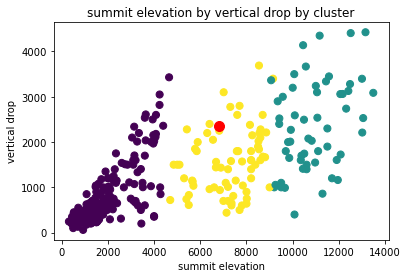

In [9]:
os.chdir('C:\\Users\\Amit\\Desktop\\SPRINGBOARD PROJECTS\\Chapter 6- DSM\\Data Wrangling\\Step 2')

plt.scatter(bmd['summit_elev'], bmd['vertical_drop'], c=bmd['clusters'], s=50, cmap='viridis', label ='clusters')
plt.scatter(big_mountain_resort['summit_elev'], big_mountain_resort['vertical_drop'], c='red', s=100)
plt.xlabel('summit elevation')
plt.ylabel('vertical drop')
plt.title('summit elevation by vertical drop by cluster')
plt.savefig('figures/fig1.png',bbox_inches='tight')

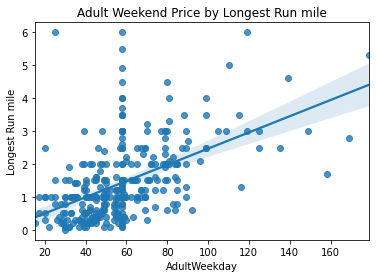

In [10]:

sns.regplot(x='AdultWeekday', y='LongestRun_mi', data =bmd)
plt.xlabel('AdultWeekday')
plt.ylabel('Longest Run mile')
plt.title('Adult Weekend Price by Longest Run mile')
plt.savefig('figures/fig2.png',bbox_inches='tight')



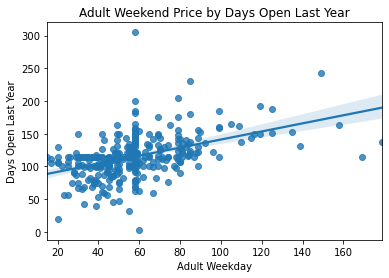

In [11]:
sns.regplot(x='AdultWeekday', y='daysOpenLastYear', data= bmd)
plt.xlabel('Adult Weekday')
plt.ylabel('Days Open Last Year')
plt.title('Adult Weekend Price by Days Open Last Year')
plt.savefig('figures/fig3.png',bbox_inches='tight')

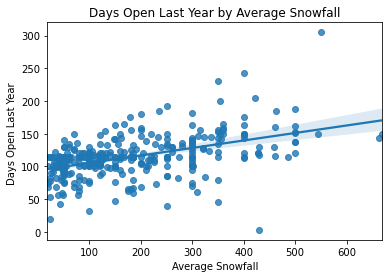

In [12]:
sns.regplot(x='averageSnowfall', y='daysOpenLastYear', data =bmd)
plt.xlabel('Average Snowfall')
plt.ylabel('Days Open Last Year ')
plt.title('Days Open Last Year by Average Snowfall')
plt.savefig('figures/fig4.png',bbox_inches='tight')



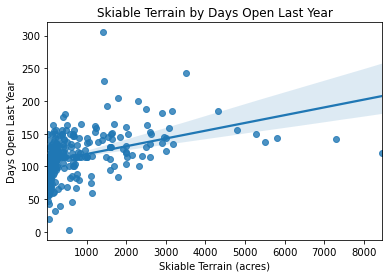

In [22]:
sns.regplot(x='SkiableTerrain_ac', y='daysOpenLastYear', data =bmd)
plt.xlabel('Skiable Terrain (acres)')
plt.ylabel('Days Open Last Year')
plt.title('Skiable Terrain by Days Open Last Year')
plt.savefig('figures/fig5.png',bbox_inches='tight')

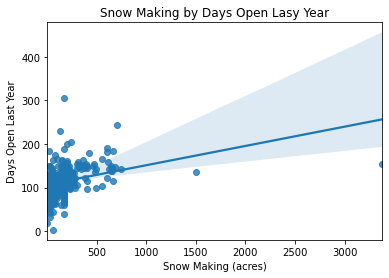

In [21]:
sns.regplot(x='Snow Making_ac', y='daysOpenLastYear', data =bmd)
plt.xlabel('Snow Making (acres)')
plt.ylabel('Days Open Last Year')
plt.title('Snow Making by Days Open Lasy Year')
plt.savefig('figures/fig6.png',bbox_inches='tight')

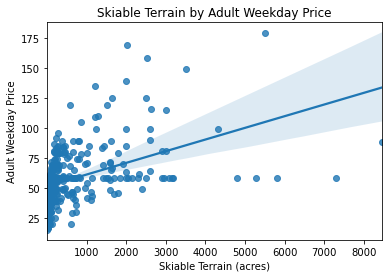

In [23]:
bmd = bmd[bmd['SkiableTerrain_ac']<20000]
sns.regplot(y='AdultWeekday', x='SkiableTerrain_ac', data =bmd)
plt.xlabel('Skiable Terrain (acres)')
plt.ylabel('Adult Weekday Price')
plt.title('Skiable Terrain by Adult Weekday Price')
plt.savefig('figures/fig2.png',bbox_inches='tight')

## Finalize Code

 Making sure our code is well organized and easy to follow is an important step. This is the time where you need to review the notebooks and Python scripts you've created and clean them up so they are easy to follow and succinct in nature. Addtionally, we will also save our final model as a callable object using Pickle for future use in a data pipeline. Pickle is a module that serializes (and de-serializes) Python objects so that they can become executable objects like functions. It's used extensively in production environments where machine learning models are deployed on an industrial scale!**<font color='teal'> Run the example code below to save out your callable model. Notice that we save it in the models folder we created in our previous guided capstone step.</font>** 

In [16]:
import pickle
s = pickle.dumps(model_3)
from joblib import dump, load
dump(model_3, 'models/regression_model_adultweekend.joblib') 

['models/regression_model_adultweekend.joblib']

## Finalize Documentation

For model documentation, we want to save the model performance metrics as well as the features included in the final model. You could also save the model perfomance metrics and coefficients fo the other models you tried in case you want to refer to them later. **<font color='teal'> Create a dataframe containing the coefficients and the model performance metrics and save it out as a csv file, then upload it to your github repository.</font>** 

In [17]:
review = {'Model':['Model 1','Model 2', 'Model 3'],'Explained Variance':[0.934765,0.925548,0.931013],'Mean Absolute Error':[5.045501,5.473406,5.276298],'Features Dropped':['-','state','state, summit_elev, base_elev']}

models = pd.DataFrame(review).set_index('Model')
models 

,Explained Variance,Mean Absolute Error,Features Dropped
Model,,,
Model 1,0.934765,5.045501,-
Model 2,0.925548,5.473406,state
Model 3,0.931013,5.276298,"state, summit_elev, base_elev"


In [18]:
print('The actual price of the Adult Weekend ticket is',Adult_weekend_price)
print('The predicted adult weekend price is {}'.format(str(price)[1:-1]))

The actual price of the Adult Weekend ticket is 81.0
The predicted adult weekend price is 64.07342102


In [19]:
coef = pd.DataFrame(abs(lm.coef_), X.columns, columns=['Coefficient'])
coef.sort_values('Coefficient', ascending=False).head(10)

,Coefficient
AdultWeekday,19.922808
vertical_drop,1.799509
Runs,1.721053
quad,1.530227
triple,1.439633
averageSnowfall,1.430904
clusters,1.345502
surface,1.282068
daysOpenLastYear,0.971712
fastQuads,0.820733


In [20]:
models.to_csv('Performace Metrics.csv')
coef.to_csv('Coefficients.csv')